<a href="https://colab.research.google.com/github/yuji-sgs/Inverse_Analytics/blob/main/Multiple_Inverse_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

import io
from google.colab import files

import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.models import Model
from keras.layers import Input, Dense

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
# データのアップロード
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
# データフレームの読み込み・確認
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df

,C2,s,w11_max,BandGap1
0,0.15,0.01,250.00,6.689500e+00
1,0.30,0.01,353.55,5.649800e+00
2,0.45,0.01,433.01,4.264400e+00
3,0.60,0.01,500.00,2.945800e+00
4,0.75,0.01,559.02,1.748300e+00
...,...,...,...,...
9995,14.40,1.00,645.50,4.090000e-12
9996,14.55,1.00,645.50,7.840000e-12
9997,14.70,1.00,645.50,2.270000e-13
9998,14.85,1.00,645.50,4.550000e-12


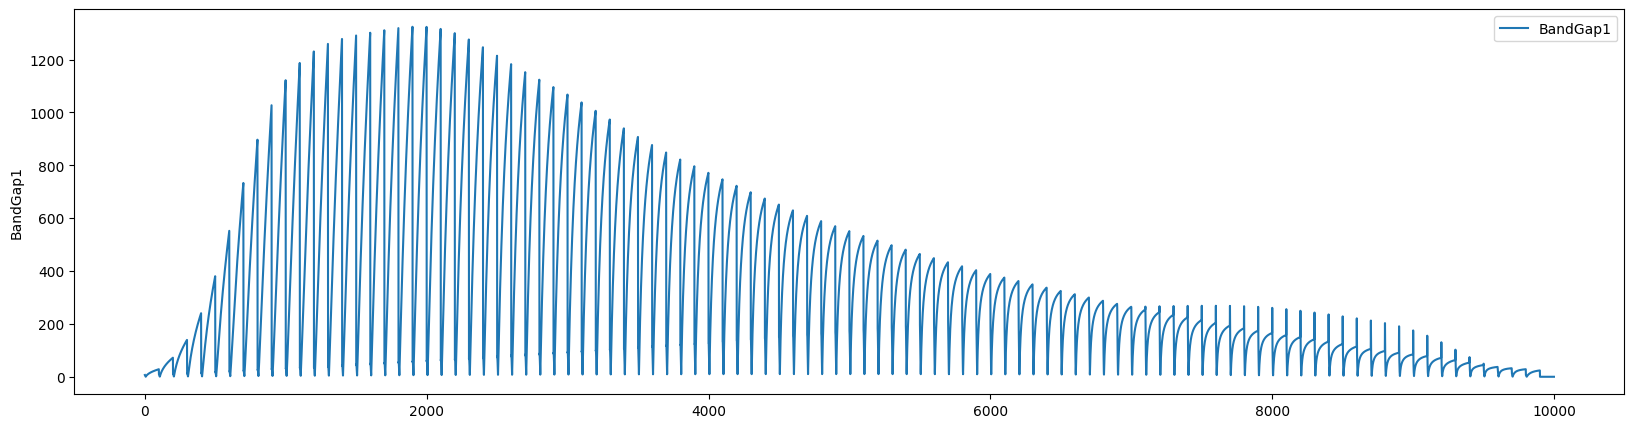

In [4]:
# データの確認
df.plot(y='BandGap1', figsize=(20, 5))
plt.ylabel('BandGap1')
plt.show()

In [5]:
# データの分割
(train, test) = train_test_split(df, test_size=0.2, shuffle=True)

# x_train, x_testではcsvファイルの1行目から２行目を， y_train, y_testでは3, 4行目のデータを活用
x_train = train.iloc[:, [0, 1]]
y_train = train.iloc[:, [2, 3]]

x_test = test.iloc[:, [0, 1]]
y_test = test.iloc[:, [2, 3]]

In [6]:
# モデルの構築
# inputの数:c2, s
inputs = Input(shape=(2,))

# 学習回数
epochs = 100
batch_size = 64

# ノード数
node = 64

x1 = Dense(node, activation='relu')(inputs)
x2 = Dense(node, activation='relu')(x1)
x3 = Dense(node, activation='relu')(x2)


x4 = Dense(node, activation='relu')(x3) # アウトプット直前の層
output1 = Dense(1, name='output1')(x4)

x5 = Dense(node, activation='relu')(x3) # アウトプット直前の層
output2 = Dense(1, name='output2')(x5)

model = Model(inputs=inputs, outputs=[output1, output2])

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(
    optimizer=optimizer,
    loss=['mse', 'mse']
)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
# 学習オプション
history = model.fit(x_train,
                    {"output1":y_train.iloc[:, [0]], "output2":y_train.iloc[:, [1]]},
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, {"output1":y_test.iloc[:, [0]], "output2":y_test.iloc[:, [1]]})
)

Epoch 1/100
125/125 [==============================] - 2s 6ms/step - loss: 521040.5000 - output1_loss: 392291.3125 - output2_loss: 128749.1875 - val_loss: 228570.5938 - val_output1_loss: 153864.8594 - val_output2_loss: 74705.7344
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 207473.4375 - output1_loss: 125975.0938 - output2_loss: 81498.3281 - val_loss: 189693.7812 - val_output1_loss: 110466.3594 - val_output2_loss: 79227.4375
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 171593.9688 - output1_loss: 90641.0703 - output2_loss: 80952.8750 - val_loss: 148563.7031 - val_output1_loss: 74394.6719 - val_output2_loss: 74169.0469
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 128915.8516 - output1_loss: 59564.9219 - output2_loss: 69350.9297 - val_loss: 101855.1250 - val_output1_loss: 43544.9766 - val_output2_loss: 58310.1602
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 94525.5469 -

In [8]:
# 構築したモデルで予測
pred1, pred2 = model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [9]:
#精度評価指標
# Output1 ====================================================================
print("=======  Output1  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 0], pred1)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 0], pred1))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 0], pred1)
print('R2：', R2)

print("")

# Output2 ====================================================================
print("=======  Output2  =======")
# MAE
test_MAE = mean_absolute_error(y_test.iloc[:, 1], pred2)
print('MAE：', test_MAE)

# RMSE
test_RMSE = sqrt(mean_squared_error(y_test.iloc[:, 1], pred2))
print('RMSE：', test_RMSE)

# 決定係数
R2 = r2_score(y_test.iloc[:, 1], pred2)
print('R2：', R2)

=======  Output1  =======
MAE： 4.765902430419922
RMSE： 7.092683966821861
R2： 0.9993648356523022

=======  Output2  =======
MAE： 4.526478512715996
RMSE： 6.991937707788582
R2： 0.9995021899667104


Text(0, 0.5, 'loss')

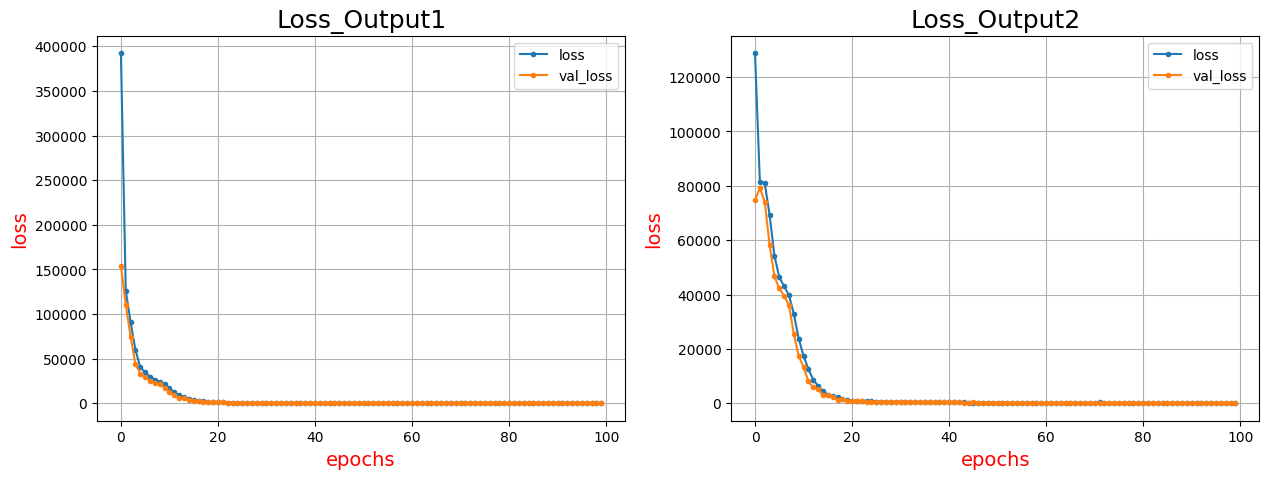

In [14]:
# Figureを追加
fig = plt.figure(figsize = (15, 5))

# Output1 ====================================================================
# 1×2 の1枚目に描画する
loss_graph1 = fig.add_subplot(1, 2, 1)

# x,yに要素追加
loss1 = history.history['output1_loss']
val_loss1 = history.history['val_output1_loss']
epochs1 = len(loss1)

# グラフ設定
loss_graph1.plot(range(epochs), loss1, marker='.', label='loss')
loss_graph1.plot(range(epochs), val_loss1, marker='.', label='val_loss')
loss_graph1.set_title("Loss_Output1", size = 18)
loss_graph1.legend(loc='best')
loss_graph1.grid()
loss_graph1.set_xlabel("epochs", size = 14, color = "r")
loss_graph1.set_ylabel("loss", size = 14, color = "r")

#==============================================================================
# Output2 ====================================================================
# 1×2 の2枚目に描画する
loss_graph2 = fig.add_subplot(1, 2, 2)

# x,yに要素追加
loss2 = history.history['output2_loss']
val_loss2 = history.history['val_output2_loss']
epochs2 = len(loss2)

# グラフ設定
loss_graph2.plot(range(epochs), loss2, marker='.', label='loss')
loss_graph2.plot(range(epochs), val_loss2, marker='.', label='val_loss')
loss_graph2.set_title("Loss_Output2", size = 18)
loss_graph2.legend(loc='best')
loss_graph2.grid()
loss_graph2.set_xlabel("epochs", size = 14, color = "r")
loss_graph2.set_ylabel("loss", size = 14, color = "r")
#==============================================================================

Text(0, 0.5, 'predicted_data')

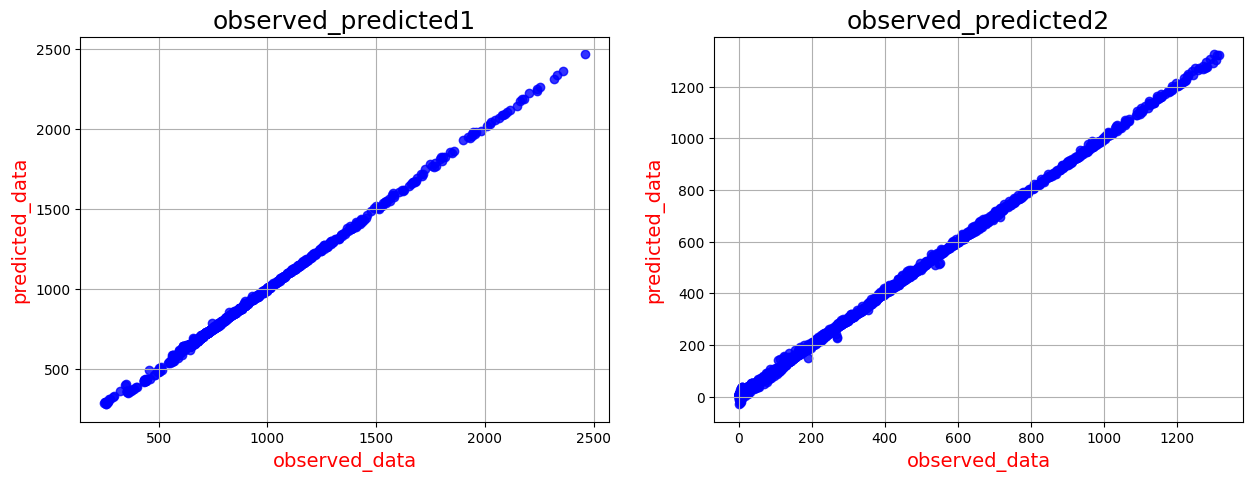

In [11]:
# Observed-Predicted Plot
# Figureを追加
fig = plt.figure(figsize = (15, 5))

# Output1 ====================================================================
# 1×2 の1枚目に描画する
yy1 = fig.add_subplot(1, 2, 1)

yy1.scatter(y_test.iloc[:, 0], pred1, c='blue', alpha=0.8)

# グラフ設定
yy1.set_title("observed_predicted1", size = 18)
yy1.grid()
yy1.set_xlabel("observed_data", size = 14, color = "r")
yy1.set_ylabel("predicted_data", size = 14, color = "r")

# Output2 ====================================================================
# 1×2 の2枚目に描画する
yy2 = fig.add_subplot(1, 2, 2)

yy2.scatter(y_test.iloc[:, 1], pred2, c='blue', alpha=0.8)

# グラフ設定
yy2.set_title("observed_predicted2", size = 18)
yy2.grid()
yy2.set_xlabel("observed_data", size = 14, color = "r")
yy2.set_ylabel("predicted_data", size = 14, color = "r")